# Reminder: here we have FINALLY completed the code to calculate FWHM, now we can complete the first half of the data. A few plotting question needs to be asked but otherwise good to go

In [1]:
#import useful files
import statistics as stat
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
path = "Tektronix_data/"
all_files = glob.glob(path + "tek0000ALL.csv")

In [3]:
var = [pd.read_csv(filename,index_col=None,header=0,skiprows=17) for filename in all_files]

In [4]:
dataframe = pd.concat(var,axis=0,ignore_index=True)

In [5]:
dataframe

,TIME,CH1,CH2,CH3,CH4
0,-9.430000e-08,-0.004,0.002,-4.000000e-03,0.008
1,-9.410000e-08,-0.004,-0.002,4.440890e-17,0.008
2,-9.390000e-08,-0.004,-0.010,-8.000000e-03,0.004
3,-9.370000e-08,-0.012,-0.002,-8.000000e-03,0.008
4,-9.350000e-08,-0.004,-0.010,-4.000000e-03,0.008
...,...,...,...,...,...
995,1.047000e-07,-0.008,-0.006,4.440890e-17,0.008
996,1.049000e-07,0.000,0.002,-8.000000e-03,0.004
997,1.051000e-07,-0.008,-0.002,-8.000000e-03,0.008
998,1.053000e-07,-0.004,0.002,4.440890e-17,0.004


In [6]:
#change the data type
dataframe.astype(float)

,TIME,CH1,CH2,CH3,CH4
0,-9.430000e-08,-0.004,0.002,-4.000000e-03,0.008
1,-9.410000e-08,-0.004,-0.002,4.440890e-17,0.008
2,-9.390000e-08,-0.004,-0.010,-8.000000e-03,0.004
3,-9.370000e-08,-0.012,-0.002,-8.000000e-03,0.008
4,-9.350000e-08,-0.004,-0.010,-4.000000e-03,0.008
...,...,...,...,...,...
995,1.047000e-07,-0.008,-0.006,4.440890e-17,0.008
996,1.049000e-07,0.000,0.002,-8.000000e-03,0.004
997,1.051000e-07,-0.008,-0.002,-8.000000e-03,0.008
998,1.053000e-07,-0.004,0.002,4.440890e-17,0.004


In [7]:
def FWHM_time_duration(X,Y):
    half_max = max(Y) / 2.
    #find the full width at half maxima, we choose denominator to be 2
    #if we want full width at tenth maxima, we choose it to be 10 
    frac = 2
    d = Y - (max(Y) / frac) 
    #locate and subtract the 2 points in x axis (which is difference in time) for FWHM duration
    indexes = np.where(d > 0)[0]
    return abs(X[indexes[-1]] - X[indexes[0]])

In [8]:
def FWHM_value(Y):
    FWHM = max(Y)/2
    return FWHM

In [10]:
FWHM_time_duration(dataframe.TIME,dataframe.CH2)

2e-09

(0.0, 1e-08)

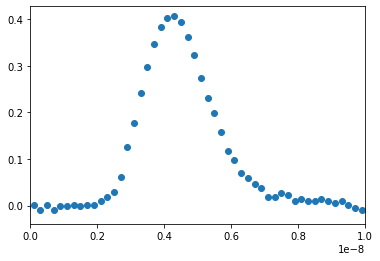

In [11]:
fig, ax = plt.subplots()
ax.scatter(dataframe.TIME,dataframe.CH2)
ax.set_xlim([0,1e-8])

In [12]:
dataframe.CH2.max()/2

0.203

In [13]:
FWHM_value(dataframe.CH2)

0.203